# Linear Regresion

## Explicacion de Regresion Lineal Simple entre dos de esas variables

### Analisis por escuderia de la regresion lineal simple 

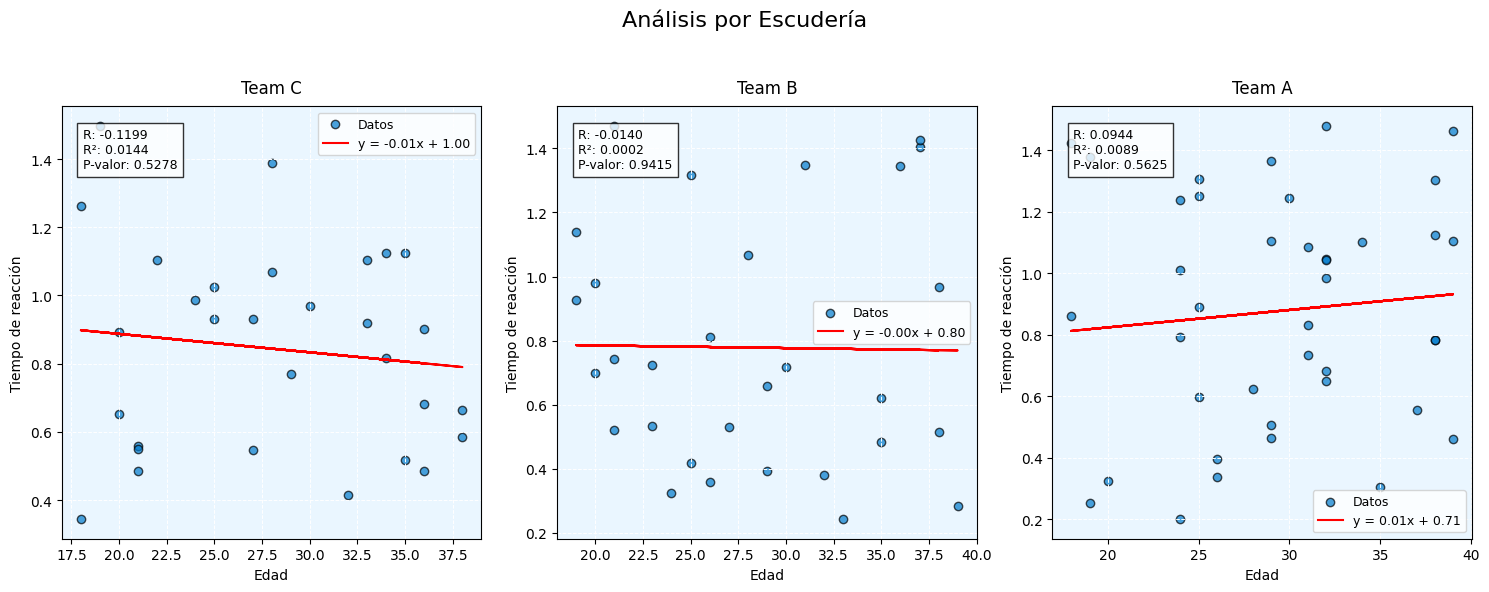

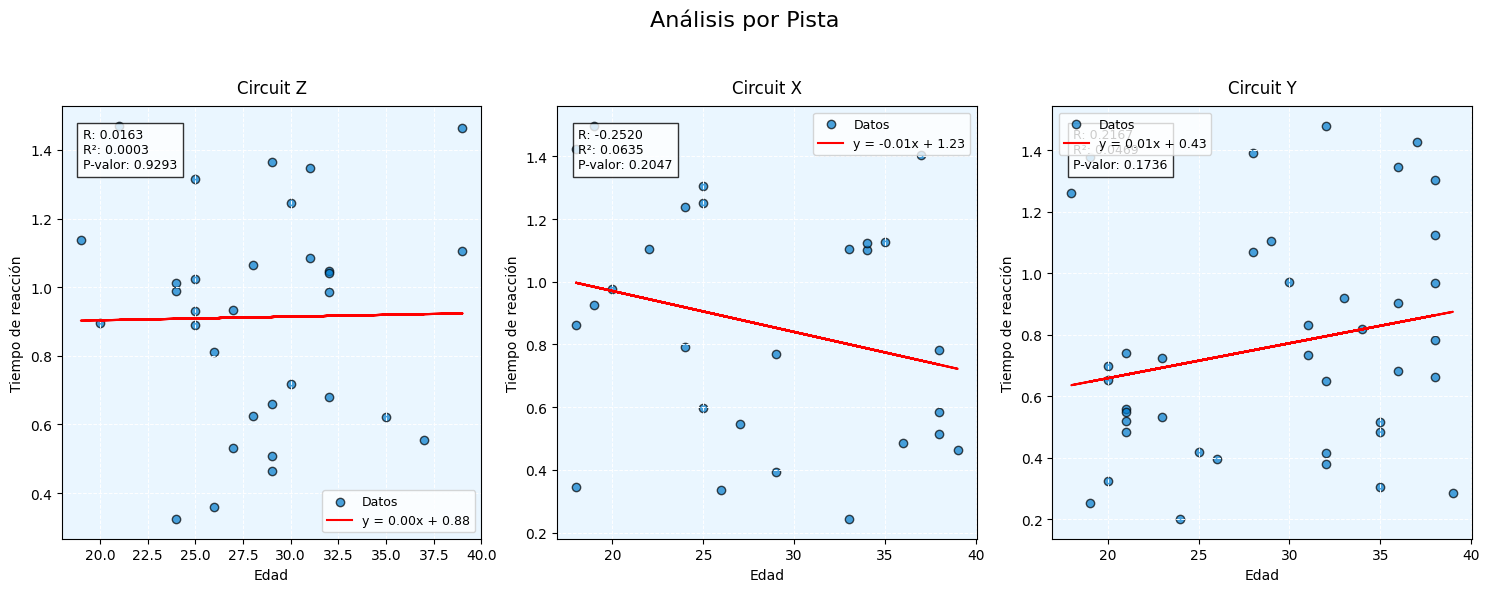

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Función para crear subgráficas de regresión
def plot_regression(ax, x, y, x_label, y_label, title):
    if len(x) == 0 or len(y) == 0:
        ax.set_title(f"{title}\nSin datos disponibles", fontsize=10, color='red')
        return

    # Ajuste de regresión lineal
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    line = slope * np.array(x) + intercept

    # Fondo azul claro
    ax.set_facecolor('#EAF6FF')

    # Gráfica
    ax.scatter(x, y, alpha=0.7, edgecolors='k', label='Datos', color='#007ACC')
    ax.plot(x, line, color='r', label=f'y = {slope:.2f}x + {intercept:.2f}')
    
    # Configuración de ejes y títulos
    ax.set_xlabel(x_label, fontsize=10)
    ax.set_ylabel(y_label, fontsize=10)
    ax.set_title(title, fontsize=12, pad=10)
    ax.legend(fontsize=9)
    ax.grid(color='white', linestyle='--', linewidth=0.7)

    # Mostrar métricas
    ax.text(0.05, 0.95, f"R: {r_value:.4f}\nR²: {r_value**2:.4f}\nP-valor: {p_value:.4f}", 
            transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Ejemplo: DataFrame ficticio


df = pd.read_csv('formula1_enhanced_data.csv')
df = pd.DataFrame({
    'Age': np.random.randint(18, 40, 100),
    'ReactionTime': np.random.uniform(0.2, 1.5, 100),
    'Team': np.random.choice(['Team A', 'Team B', 'Team C'], 100),
    'Circuit': np.random.choice(['Circuit X', 'Circuit Y', 'Circuit Z'], 100)
})

# Convertir columnas a tipo numérico
numeric_columns = ['DriverSkill', 'ReactionTime']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Crear subgráficas para análisis por escudería
teams = df['Team'].unique()
num_teams = len(teams)

fig, axes = plt.subplots(1, num_teams, figsize=(5 * num_teams, 6))
fig.suptitle('Análisis por Escudería', fontsize=16)

for ax, team in zip(axes, teams):
    team_data = df[df['Team'] == team]
    plot_regression(ax, team_data['Age'], team_data['ReactionTime'], 'Edad', 'Tiempo de reacción', f'{team}')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste de márgenes
plt.show()

# Crear subgráficas para análisis por pista
circuits = df['Circuit'].unique()
num_circuits = len(circuits)

fig, axes = plt.subplots(1, num_circuits, figsize=(5 * num_circuits, 6))
fig.suptitle('Análisis por Pista', fontsize=16)

for ax, circuit in zip(axes, circuits):
    circuit_data = df[df['Circuit'] == circuit]
    plot_regression(ax, circuit_data['Age'], circuit_data['ReactionTime'], 'Edad', 'Tiempo de reacción', f'{circuit}')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste de márgenes
plt.show()


### Analisis por circuito

In [ ]:
###

## Regresion Lineal Multiple

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import requests
from io import StringIO

# Descargar y leer el archivo CSV original
df = pd.read_csv('formula1_race_data.csv')

# Filtrar datos para Mercedes en Silverstone
mercedes_silverstone = df[(df['Team'] == 'RedBull') & (df['Circuit'] == 'Silverstone')]

# Crear una relación lineal más clara entre la posición de clasificación y los puntos
np.random.seed(42)  # Para reproducibilidad
n_races = len(mercedes_silverstone)
qualifying_positions = np.random.randint(1, 11, n_races)  # Posiciones de clasificación entre 1 y 10
points = 26 - 2 * qualifying_positions + np.random.normal(0, 2, n_races)  # Relación lineal con algo de ruido
points = np.clip(points, 0, 26)  # Asegurar que los puntos estén entre 0 y 26

# Actualizar el DataFrame con los nuevos datos
mercedes_silverstone['QualifyingPosition'] = qualifying_positions
mercedes_silverstone['Points'] = points

# Función para realizar regresión lineal y graficar
def plot_regression(x, y, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, line, color='r', label=f'y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"Coeficiente de correlación (R): {r_value:.4f}")
    print(f"Coeficiente de determinación (R^2): {r_value**2:.4f}")
    print(f"Valor p: {p_value:.4f}")

# Realizar el análisis de regresión
plot_regression(mercedes_silverstone['QualifyingPosition'], mercedes_silverstone['Points'], 
                'Posición de Clasificación', 'Puntos', 
                'RedBull en Silverstone: Posición de Clasificación vs Puntos')

# Mostrar los datos modificados
print(mercedes_silverstone[['Date', 'Driver', 'QualifyingPosition', 'Points']])

ValueError: Inputs must not be empty.